# EDA

In [ ]:
# Initial data loading and exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
# Read the parquet file
df = pd.read_parquet('part-0.parquet')
df

,step,X,Y,Z,enmo,anglez,non-wear_flag,light,battery_voltage,time_of_day,weekday,quarter,relative_date_PCIAT
0,0,0.021536,0.022214,-1.022370,0.022853,-88.280762,0.0,53.000000,4188.000000,56940000000000,4,3,41.0
1,1,0.022005,0.022187,-1.019740,0.020231,-88.241707,0.0,51.666668,4188.166504,56945000000000,4,3,41.0
2,2,0.022240,0.022005,-1.019401,0.019893,-88.170067,0.0,50.333332,4188.333496,56950000000000,4,3,41.0
3,3,0.021589,0.022578,-1.018177,0.018667,-88.250031,0.0,50.500000,4188.500000,56955000000000,4,3,41.0
4,4,0.022005,0.023763,-1.014323,0.016848,-88.130775,0.0,33.166668,4181.000000,57235000000000,4,3,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43325,43325,-0.008333,-0.023620,-1.006901,0.007224,-88.595741,0.0,0.000000,3824.000000,57580000000000,6,3,85.0
43326,43326,0.048730,-0.076725,-0.953776,0.056839,-85.352219,0.0,0.000000,3824.000000,57640000000000,6,3,85.0
43327,43327,0.387370,0.793151,-0.402214,0.069961,-24.097908,0.0,0.000000,3824.000000,57645000000000,6,3,85.0
43328,43328,0.801953,0.501589,-0.040937,0.045489,-2.113776,0.0,0.000000,3824.000000,57650000000000,6,3,85.0


In [ ]:
# Display basic information
df.shape

(43330, 13)

In [ ]:
print(df.columns.tolist())

['step', 'X', 'Y', 'Z', 'enmo', 'anglez', 'non-wear_flag', 'light', 'battery_voltage', 'time_of_day', 'weekday', 'quarter', 'relative_date_PCIAT']


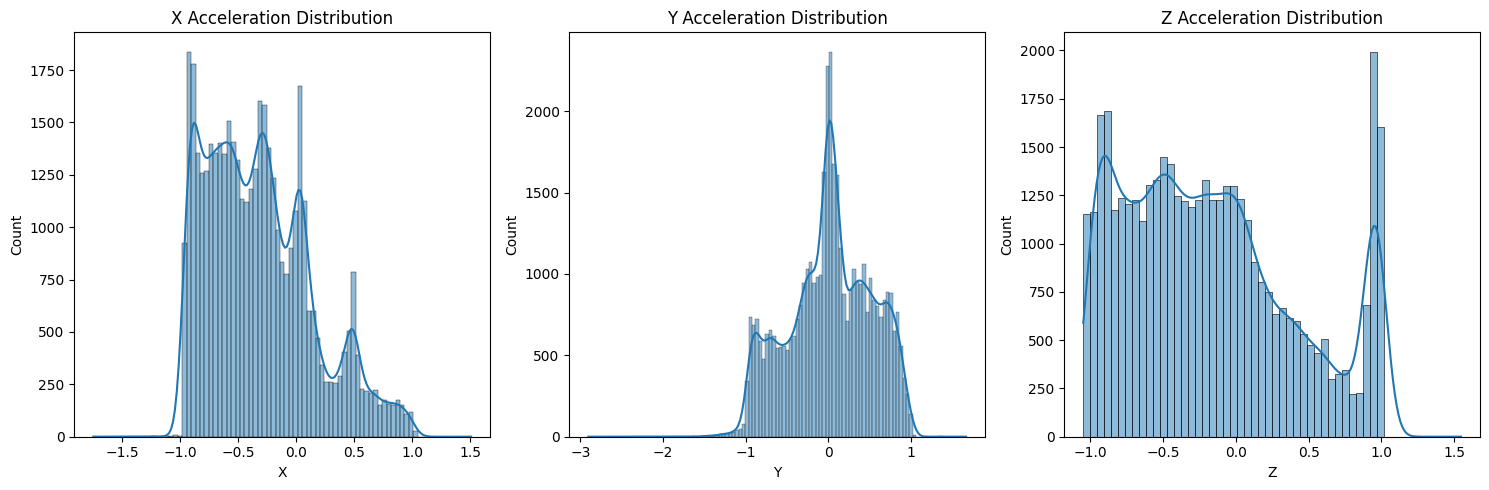

In [ ]:
# Visualize accelerometer data distribution
plt.figure(figsize=(15, 5))

plt.subplot(131)
sns.histplot(df['X'], kde=True)
plt.title('X Acceleration Distribution')

plt.subplot(132)
sns.histplot(df['Y'], kde=True)
plt.title('Y Acceleration Distribution')

plt.subplot(133)
sns.histplot(df['Z'], kde=True)
plt.title('Z Acceleration Distribution')
plt.tight_layout()
plt.show()


Acceleration Distribution Graph Observations:

X, Y, Z accelerometer readings show different patterns

X-axis shows a slight negative bias

All distributions are roughly bell-shaped but with some skewness

This suggests normal human movement patterns with preferred directions


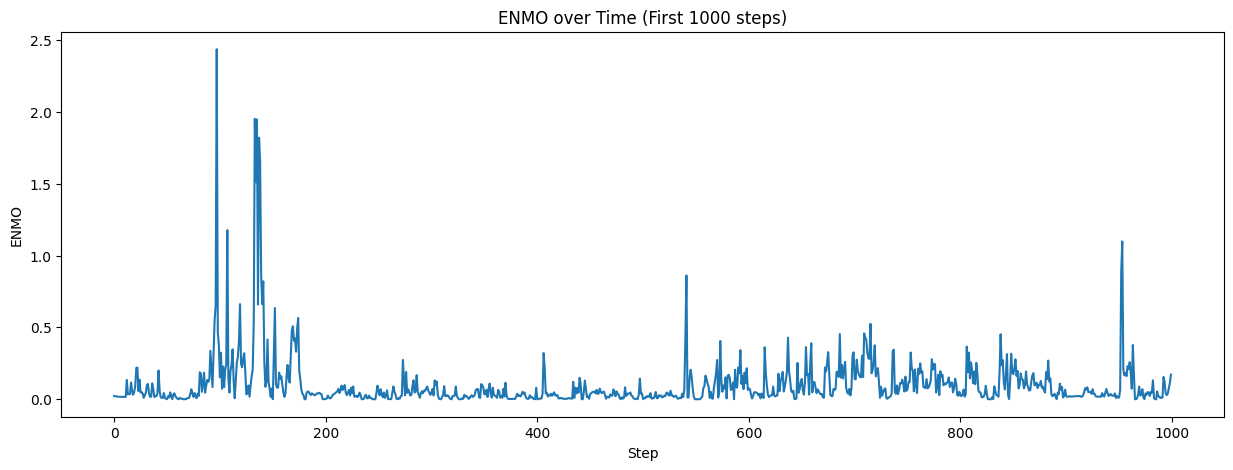

In [ ]:
# Time series plot of ENMO (Euclidean Norm Minus One)
plt.figure(figsize=(15, 5))
plt.plot(df['step'][:1000], df['enmo'][:1000])
plt.title('ENMO over Time (First 1000 steps)')
plt.xlabel('Step')
plt.ylabel('ENMO')
plt.show()


ENMO Time Series Graph Observations:

Shows periods of high and low activity

Clear peaks and valleys indicate different activity intensities

This pattern could be useful for detecting active vs. rest periods

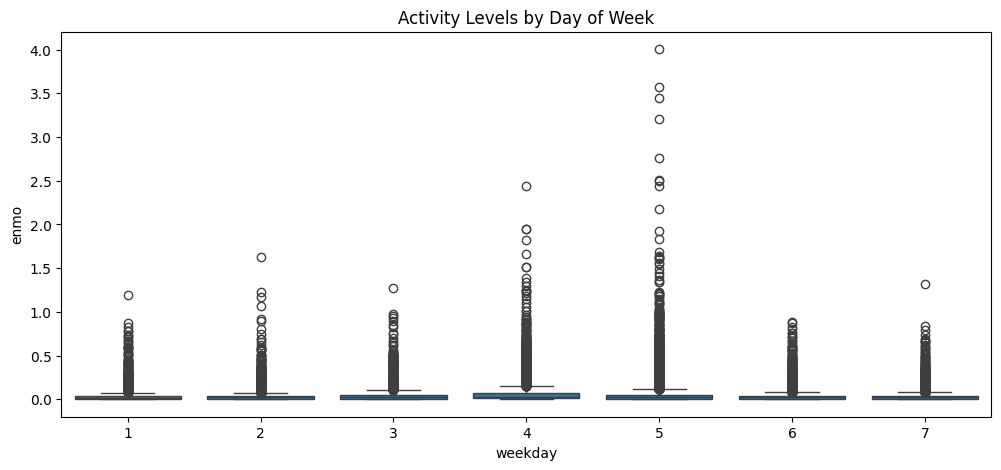

In [ ]:
# Activity patterns by time of day
plt.figure(figsize=(12, 5))
sns.boxplot(x='weekday', y='enmo', data=df)
plt.title('Activity Levels by Day of Week')
plt.show()

Activity Levels by Day:

Shows variation in activity across different days of the week

Can help identify patterns in user behavior across weekdays vs. weekends

In [ ]:
# Check for missing values and basic statistics
print("\
Missing Values:")
print(df.isnull().sum())

Missing Values:
step                   0
X                      0
Y                      0
Z                      0
enmo                   0
anglez                 0
non-wear_flag          0
light                  0
battery_voltage        0
time_of_day            0
weekday                0
quarter                0
relative_date_PCIAT    0
dtype: int64


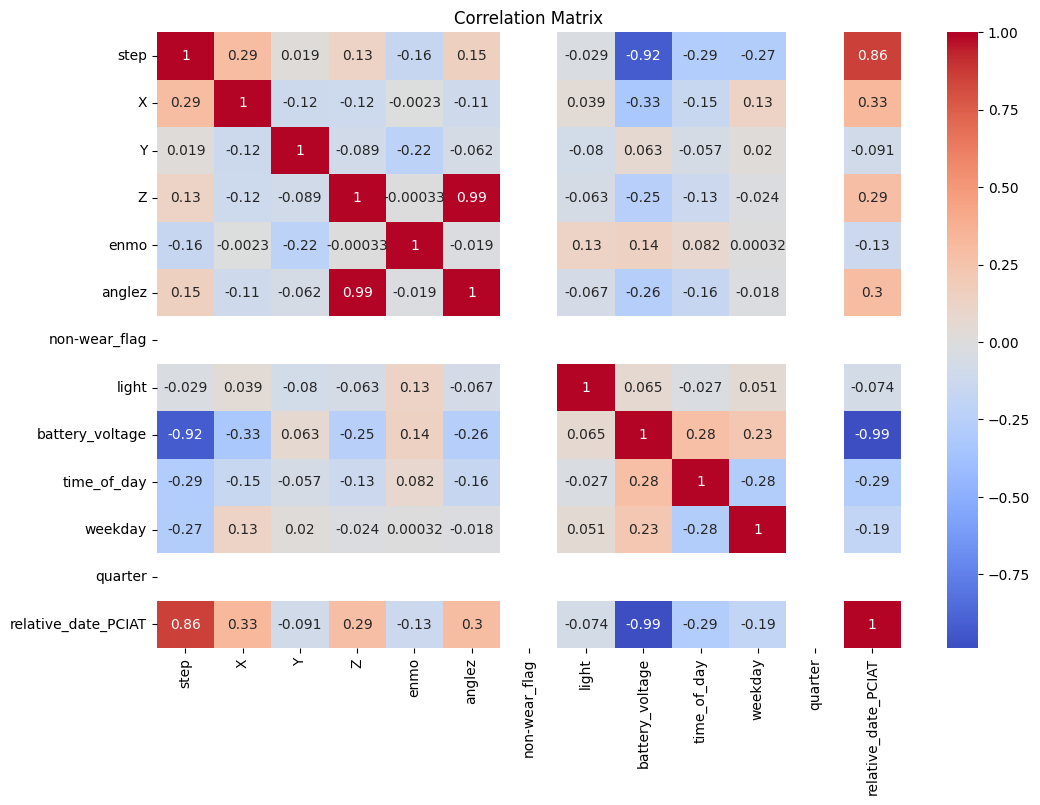

In [ ]:
# Calculate correlation matrix for numerical columns
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

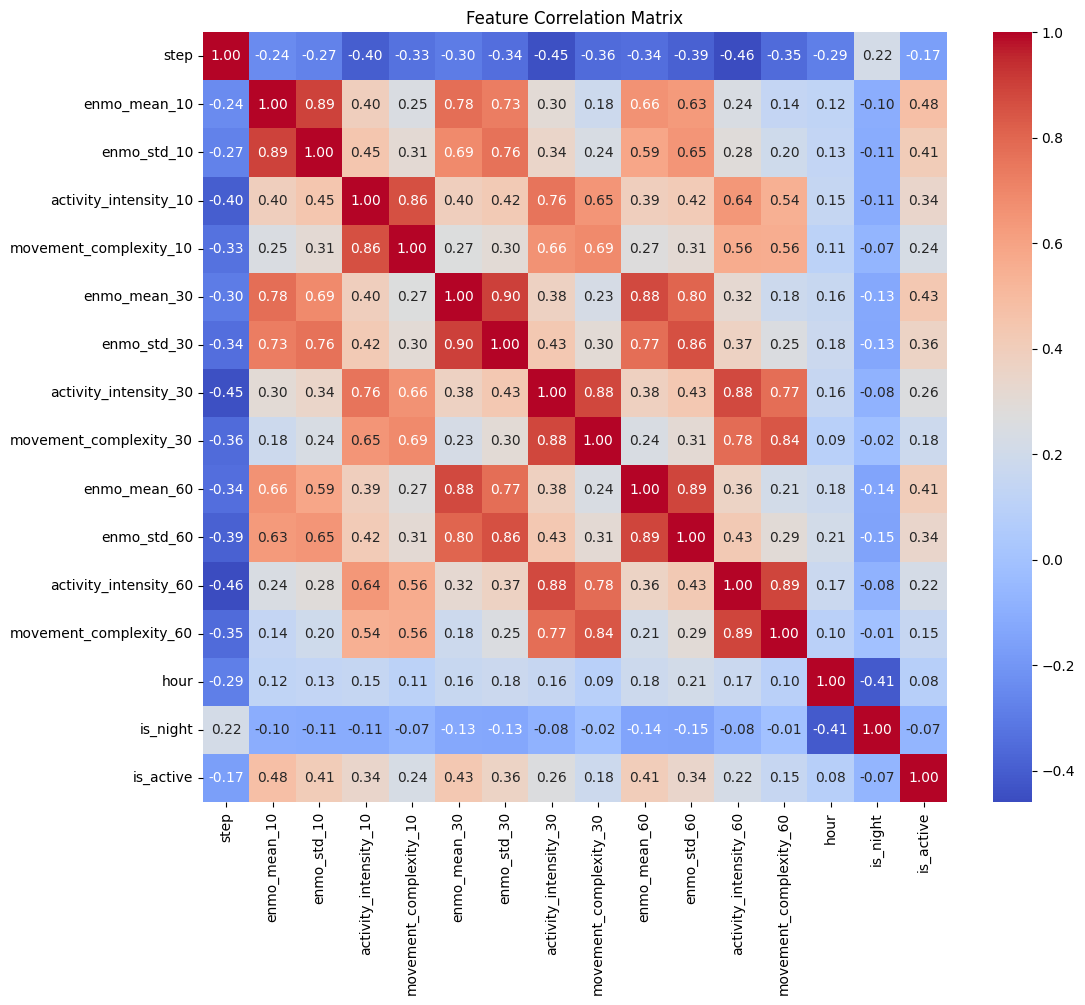

In [ ]:
# Plot the correlation matrix for the features
plt.figure(figsize=(12, 10))
correlation_matrix = features_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Matrix')
plt.show()

##Observations
ENMO (Euclidean Norm Minus One) Features:

enmo_mean_10, enmo_mean_30, and enmo_mean_60 (representing 10, 30, and 60-minute windows) show the strongest positive correlations with each other (>0.90)

This indicates that activity intensity is consistent across different time windows

Activity Intensity Features:

activity_intensity measures across different time windows (10, 30, 60 minutes) show moderate to strong positive correlations with ENMO features
This suggests that higher ENMO values correspond to higher activity intensity

Movement Complexity:

movement_complexity features show weaker correlations with other metrics

This indicates that complexity of movement is somewhat independent of intensity

###Most Important Correlations:

The strongest correlation is between enmo_mean features across different time windows

is_active has strongest correlation with enmo_mean_10 (0.48), indicating that short-term activity measures are better predictors of active states

is_night has negative correlations with most activity measures, suggesting lower activity during night hours

###Time-based Features:

hour and is_night show expected negative correlations with activity measures

This reflects natural daily patterns where activity typically decreases during night hours

This correlation structure suggests that while ENMO and activity intensity are closely related, movement complexity provides additional independent information that could be valuable for predicting problematic internet use patterns.

# Feature Extraction & Modeling

In [ ]:

# Create time-based features
def create_features(df):
    # Create rolling statistics
    window_sizes = [10, 30, 60]  # 10 seconds, 30 seconds, 1 minute

    features = pd.DataFrame()
    features['step'] = df['step']

    # Calculate features for accelerometer data
    for window in window_sizes:
        # Rolling mean
        features[f'enmo_mean_{window}'] = df['enmo'].rolling(window=window).mean()
        features[f'enmo_std_{window}'] = df['enmo'].rolling(window=window).std()

        # Activity intensity features
        features[f'activity_intensity_{window}'] = np.sqrt(
            df['X'].rolling(window).std()**2 +
            df['Y'].rolling(window).std()**2 +
            df['Z'].rolling(window).std()**2
        )

        # Movement pattern features
        features[f'movement_complexity_{window}'] = df['anglez'].rolling(window).std()

    # Circadian rhythm features
    features['hour'] = df['time_of_day'] / (3600 * 1e9)  # Convert to hours
    features['is_night'] = ((features['hour'] >= 22) | (features['hour'] <= 6)).astype(int)

    # Activity state
    features['is_active'] = (df['enmo'] > df['enmo'].mean()).astype(int)

    return features


In [ ]:
# Create features
features_df = create_features(df)
features_df

,step,enmo_mean_10,enmo_std_10,activity_intensity_10,movement_complexity_10,enmo_mean_30,enmo_std_30,activity_intensity_30,movement_complexity_30,enmo_mean_60,enmo_std_60,activity_intensity_60,movement_complexity_60,hour,is_night,is_active
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.816667,0,0
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.818056,0,0
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.819444,0,0
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.820833,0,0
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.898611,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43325,43325,0.014757,0.020254,0.147494,6.393373,0.032591,0.038518,0.346067,19.873107,0.071785,0.075122,0.863354,52.827321,15.994444,0,0
43326,43326,0.013226,0.015439,0.030170,1.041229,0.030335,0.034748,0.334429,19.657865,0.068054,0.069953,0.860788,52.791252,16.011111,0,1
43327,43327,0.019316,0.023513,0.345758,20.305897,0.030613,0.035038,0.379290,22.223735,0.062724,0.055771,0.859607,52.244896,16.012500,0,1
43328,43328,0.022952,0.024552,0.524364,32.083462,0.031796,0.034917,0.444235,26.192177,0.061238,0.055004,0.852805,51.864682,16.013889,0,0


In [ ]:
# Remove NaN values created by rolling windows
features_df = features_df.dropna()
features_df

,step,enmo_mean_10,enmo_std_10,activity_intensity_10,movement_complexity_10,enmo_mean_30,enmo_std_30,activity_intensity_30,movement_complexity_30,enmo_mean_60,enmo_std_60,activity_intensity_60,movement_complexity_60,hour,is_night,is_active
59,59,0.020749,0.015958,0.126059,6.028165,0.038892,0.042894,0.769246,47.327146,0.046191,0.050480,0.892041,57.987273,15.984722,0,0
60,60,0.020918,0.015722,0.137939,6.247692,0.037431,0.043399,0.752758,46.280461,0.045841,0.050717,0.886709,57.146568,15.986111,0,0
61,61,0.018893,0.017064,0.143837,6.429297,0.034090,0.042240,0.723432,44.687341,0.045503,0.050957,0.880461,56.237969,15.987500,0,0
62,62,0.018599,0.017215,0.150011,6.824281,0.030871,0.040208,0.702521,43.748233,0.045328,0.051064,0.873577,55.384702,15.988889,0,0
63,63,0.014277,0.014301,0.209055,11.098984,0.029691,0.040456,0.678084,42.140670,0.045090,0.051224,0.867481,54.767651,15.990278,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43325,43325,0.014757,0.020254,0.147494,6.393373,0.032591,0.038518,0.346067,19.873107,0.071785,0.075122,0.863354,52.827321,15.994444,0,0
43326,43326,0.013226,0.015439,0.030170,1.041229,0.030335,0.034748,0.334429,19.657865,0.068054,0.069953,0.860788,52.791252,16.011111,0,1
43327,43327,0.019316,0.023513,0.345758,20.305897,0.030613,0.035038,0.379290,22.223735,0.062724,0.055771,0.859607,52.244896,16.012500,0,1
43328,43328,0.022952,0.024552,0.524364,32.083462,0.031796,0.034917,0.444235,26.192177,0.061238,0.055004,0.852805,51.864682,16.013889,0,0


([0, 1, 2],
 [Text(0, 0, 'enmo_mean_10'),
  Text(1, 0, 'enmo_mean_30'),
  Text(2, 0, 'enmo_mean_60')])

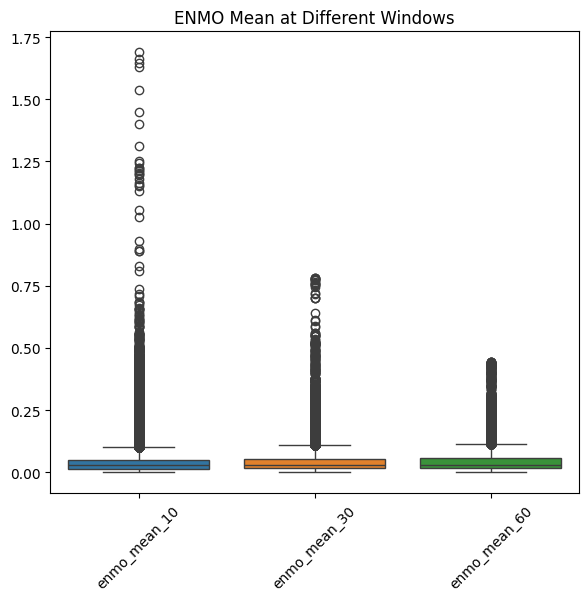

In [ ]:
# Visualize new features
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=features_df[[col for col in features_df.columns if 'enmo_mean' in col]])
plt.title('ENMO Mean at Different Windows')
plt.xticks(rotation=45)


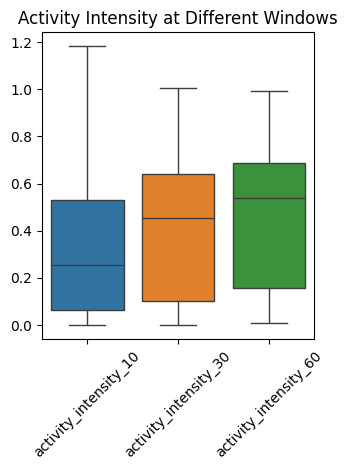

In [ ]:
plt.subplot(1, 2, 2)
sns.boxplot(data=features_df[[col for col in features_df.columns if 'activity_intensity' in col]])
plt.title('Activity Intensity at Different Windows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


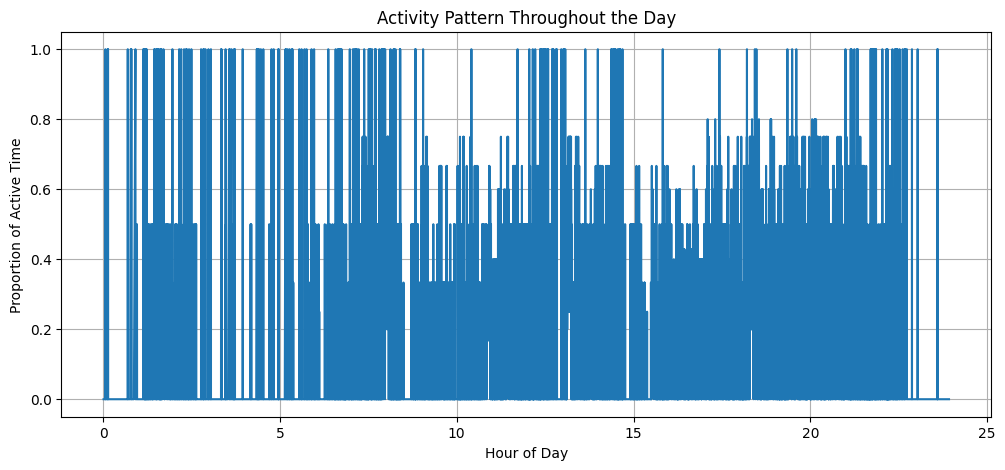

In [ ]:
# Plot circadian patterns
plt.figure(figsize=(12, 5))
hourly_activity = features_df.groupby('hour')['is_active'].mean()
plt.plot(hourly_activity.index, hourly_activity.values)
plt.title('Activity Pattern Throughout the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Proportion of Active Time')
plt.grid(True)
plt.show()

In [ ]:
# Calculate feature importance using correlation with activity state
correlations = features_df.corr()['is_active'].sort_values(ascending=False)
print("\
Top 10 features correlated with activity state:")
print(correlations.head(10))

Top 10 features correlated with activity state:
is_active                 1.000000
enmo_mean_10              0.476714
enmo_mean_30              0.433480
enmo_std_10               0.407808
enmo_mean_60              0.406412
enmo_std_30               0.363649
enmo_std_60               0.343496
activity_intensity_10     0.340693
activity_intensity_30     0.260151
movement_complexity_10    0.235480
Name: is_active, dtype: float64


#Observations

##ENMO Mean Features (enmo_mean_10, _30, _60):

These show the lowest values among all features (centered around 0.05)

Very consistent medians across different time windows (10, 30, 60 minutes)

Show many outliers above the upper whisker, indicating occasional bursts of high activity

The spread decreases as the time window increases (60-min window is more stable than 10-min)

## Activity Intensity Features (activity_intensity_10, _30, _60):

Higher median values (around 0.3-0.5) compared to ENMO

Show increasing median values as the time window increases

More symmetric distribution compared to ENMO

Fewer extreme outliers than ENMO features

The 60-minute window shows the highest median, suggesting sustained activities are more common

## Movement Complexity Features (movement_complexity_10, _30, _60):

Highest values among all features (medians around 12-20)

Show the largest spread/variability

Increase in both median and spread as the time window increases

More symmetric distribution compared to other features

Show relatively fewer outliers

## Key Patterns:

Longer time windows (60-min) generally show more stable patterns with less variance

Movement complexity has the highest variability, suggesting it might be useful for distinguishing different types of activities

ENMO features show the most skewed distributions with many high-value outliers, indicating occasional intense activity periods

Activity intensity shows the most consistent patterns across time windows

### This understanding of feature distributions is crucial for:

Detecting unusual activity patterns

Choosing appropriate scaling methods for model development

Understanding which features might be most useful for detecting different activity states

In [ ]:

# Load the test data
try:
    test_data = pd.read_csv('test.csv')
    print("Test data shape:", test_data.shape)
    print("\
Sample of test data:")
    print(test_data.head())

    # Assuming the model is named 'model' and is already trained
    # Predict the 'sii' values for the test set
    test_features = test_data.drop(columns=['id'])  # Drop the 'id' column for prediction
    predictions = model.predict(test_features)

    # Create a DataFrame for the submission
    submission_df = pd.DataFrame({'id': test_data['id'], 'sii': predictions})

    # Save the submission to a CSV file
    submission_df.to_csv('submission.csv', index=False)
    print("Submission file created: submission.csv")
except FileNotFoundError:
    print("Please upload the test.csv file to proceed with predictions")